In [51]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve

In [52]:
def gaussian_kernel(size, sigma = 1.0):
    x = np.arange(-size // 2 + 1, size // 2 + 1)
    kernel = np.exp(-(x**2) / (2 * sigma**2))
    kernel /= kernel.sum()
    return kernel

def action_kernel(size, sigma = 1.0):
    x = np.arange(-size // 2 + 1, size // 2 + 1)
    kernel = np.exp(-(x**2) / (2 * (sigma/(np.exp(x) + 1))**2))
    kernel /= kernel.sum()
    return kernel


def block_kernel(size):
    return np.ones(size)/size

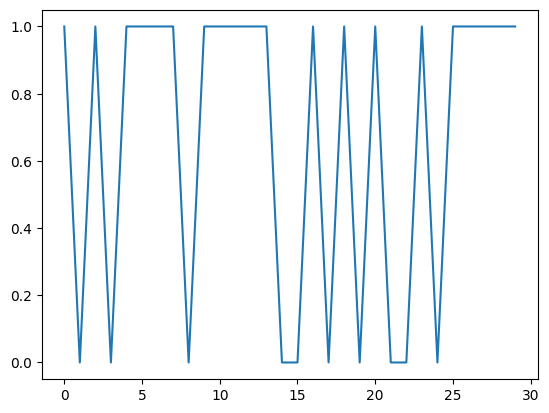

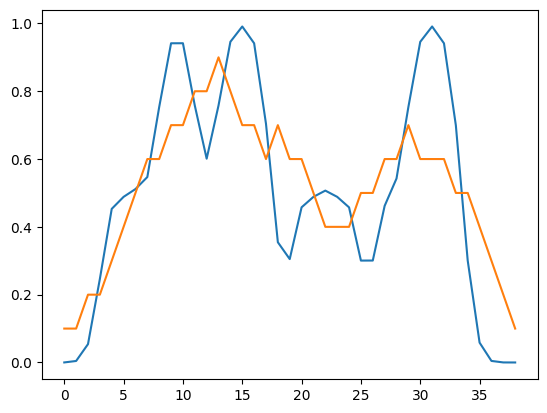

In [53]:
signal = np.astype(np.random.uniform(0, 1, 30) > 0.3, np.float32)
gaussian_kernel(5, 1)#np.array([1]*5)/5

size = 10
plt.plot(signal)
plt.show()
plt.plot(convolve(signal, gaussian_kernel(size), mode='full'))
plt.plot(convolve(signal, block_kernel(size), mode='full'))
plt.show()

In [54]:
def smooth_signal(signal, res_coof, kernels_size = 3, gauss_sigma = 1):
    size = signal.shape[0]
    timescale = size
    stretched_signal = np.repeat(signal, res_coof)
    new_size = size * res_coof
    
    G = gaussian_kernel(kernels_size, gauss_sigma*kernels_size/10)
    B = block_kernel(kernels_size)
    w = convolve(stretched_signal, B, 'same',)
    A = convolve(stretched_signal, G, 'same')
    t = np.linspace(0, timescale, new_size)
    return (1-np.cos(stretched_signal*2*np.pi*t))/2


In [55]:
def convert_to_freq(signal, res_coof):
    size = signal.shape[0]
    stretched_signal = np.repeat(signal, res_coof)
    new_size = size * res_coof
    
    t = np.linspace(0, size, new_size)
    return (1-np.cos(stretched_signal*2*np.pi*t))/2

def smooth_ampl(signal, res_coof, gauss_sigma = 1.5):
    size = signal.shape[0]
    stretched_signal = np.repeat(signal, res_coof)
    new_size = size * res_coof
    G = action_kernel(res_coof*10, gauss_sigma*res_coof/10)
    return convolve(stretched_signal, G, 'same')

In [ ]:
def convert(signal, res_coof): # res_coof во сколько раз увеличить разрешение во времени
    size = signal.shape[0]
    stretched_signal = np.repeat(signal, res_coof)
    new_size = size * res_coof
    
    t = np.linspace(0, size, new_size)
    return stretched_signal*(1-np.cos((stretched_signal != 0)*2*np.pi*t))/2

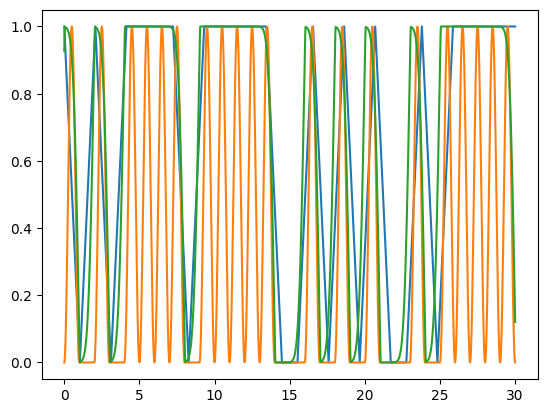

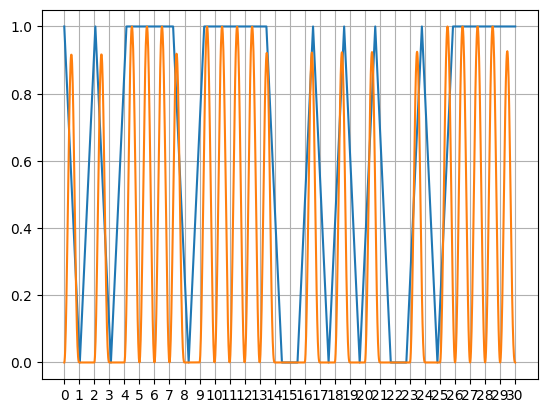

In [56]:
res_coof = 50
new_size = res_coof*signal.shape[0]
timescale = signal.shape[0]
t_1 = np.linspace(0, timescale, signal.shape[0])
t_2 = np.linspace(0, timescale, new_size)
plt.plot(t_1, signal)
plt.plot(t_2, convert_to_freq(signal, res_coof))    
plt.plot(t_2, a := smooth_ampl(signal, res_coof, gauss_sigma = 3.0))
plt.show()
plt.grid(True)
plt.plot(t_1, signal)
plt.plot(t_2, a*convert_to_freq(signal != 0.0, res_coof))
plt.xticks(
    ticks=np.unique(
        np.concatenate([
            np.arange(int(t_1[0]), int(t_1[-1])+1),
            np.arange(int(t_2[0]), int(t_2[-1])+1)
        ])
    )
)
plt.show()